# Data Project: The effect of GDP on Unemployment

In this project we are looking at the effect of GDP on unemployment. We are inspired by Okuns law which states that an increase in (real) GDP by 3 % leads to a fall in unemployment by 1 %. We will look at the general tendency of an increase in GDP leading to a increase in unemployment by looking on time-series data for USA from the World Bank covering the period 1992-2017. 



 ## 1.1 Importing and processing GDP data

In [ ]:
#Import packages:

In [1]:
from pandas_datareader import wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [ ]:
#Import GDP data from World bank:

In [2]:
gdps_wb = wb.download(indicator='NY.GDP.PCAP.KD', country=['US'], start=1990, end=2018)
gdps_wb = gdps_wb.rename(columns = {'NY.GDP.PCAP.KD':'gdp'})
gdps_wb = gdps_wb.reset_index()
gdps_wb.year = gdps_wb.year.astype(int)
gdps_wb.head(10)

,country,year,gdp
0,United States,2018,NaN
1,United States,2017,53128.539700
2,United States,2016,52319.163351
3,United States,2015,51933.404806
4,United States,2014,50871.674083
5,United States,2013,49971.951357
6,United States,2012,49498.390916
7,United States,2011,48786.454976
8,United States,2010,48375.406946
9,United States,2009,47575.608563


One can see a positive development in GDP in recent years.

In [ ]:
#Download GDP growth data

In [3]:
gdpgrowth_wb = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['US'], start=1990, end=2018)
gdpgrowth_wb = gdpgrowth_wb.rename(columns = {'NY.GDP.MKTP.KD.ZG':'gdp_growth'})
gdpgrowth_wb = gdpgrowth_wb.reset_index()
gdpgrowth_wb.year = gdpgrowth_wb.year.astype(int)
gdpgrowth_wb.head(10)

,country,year,gdp_growth
0,United States,2018,NaN
1,United States,2017,2.273339
2,United States,2016,1.485279
3,United States,2015,2.861587
4,United States,2014,2.569194
5,United States,2013,1.677332
6,United States,2012,2.224031
7,United States,2011,1.601455
8,United States,2010,2.531921
9,United States,2009,-2.775530


This table shows that after 2009 there has been a positive growth-rate in GDP. This comes after a negative groth during the Financial Crisis.

 ## 1.2 Importing and processing unemployment data

In [ ]:
#Import unemployment data from excel file:

In [4]:
unempl = pd.read_excel('Data.xlsx')
print(unempl)

    year  Unemployment
0   1992  6.700001e-01
1   1993 -5.799999e-01
2   1994 -8.200002e-01
3   1995 -5.000000e-01
4   1996 -1.999998e-01
5   1997 -4.600000e-01
6   1998 -4.299998e-01
7   1999 -2.900004e-01
8   2000 -2.299998e-01
9   2001  7.400000e-01
10  2002  1.050000e+00
11  2003  2.099996e-01
12  2004 -4.599996e-01
13  2005 -4.500003e-01
14  2006 -4.600000e-01
15  2007  1.000000e-07
16  2008  1.160000e+00
17  2009  3.470000e+00
18  2010  3.800001e-01
19  2011 -6.800003e-01
20  2012 -8.800001e-01
21  2013 -6.899996e-01
22  2014 -1.210000e+00
23  2015 -8.899999e-01
24  2016 -4.100003e-01
25  2017 -5.099998e-01
26  2018 -3.240004e-01


One can see at period from 2007-2010 with a positive change in uemployment rate which coincides with the aftermath of the financial crisis. There is also a positive development from 2001-2003 where the developed countries also experienced a recession. After 2010 it decreases.

In [ ]:
#Change type:

In [5]:
gdpgrowth_wb.year = gdpgrowth_wb.year.astype(int)
gdps_wb.year = gdps_wb.year.astype(int)
unempl.year = unempl.year.astype(int)

## 1.3 Combining the datasets

In [ ]:
#Merge data:

In [6]:
mergeddata = pd.merge(unempl, gdpgrowth_wb, how='outer', on = ['year'])
print(unempl.shape)
print(gdpgrowth_wb.shape)
print(mergeddata.shape)
mergeddata.sample(10)

(27, 2)
(29, 3)
(29, 4)


,year,Unemployment,country,gdp_growth
12,2004,-0.46,United States,3.785743
25,2017,-0.51,United States,2.273339
20,2012,-0.88,United States,2.224031
0,1992,0.67,United States,3.555396
5,1997,-0.46,United States,4.487026
18,2010,0.38,United States,2.531921
13,2005,-0.45,United States,3.345216
22,2014,-1.21,United States,2.569194
1,1993,-0.58,United States,2.745857
6,1998,-0.43,United States,4.449911


In [ ]:
#Sort data:

In [7]:
mergeddata.sort_index()

,year,Unemployment,country,gdp_growth
0,1992,6.700001e-01,United States,3.555396
1,1993,-5.799999e-01,United States,2.745857
2,1994,-8.200002e-01,United States,4.037643
3,1995,-5.000000e-01,United States,2.718976
4,1996,-1.999998e-01,United States,3.795881
5,1997,-4.600000e-01,United States,4.487026
6,1998,-4.299998e-01,United States,4.449911
7,1999,-2.900004e-01,United States,4.685200
8,2000,-2.299998e-01,United States,4.092176
9,2001,7.400000e-01,United States,0.975982


In [ ]:
#Clean data (drop if missing data) and convert to float:

In [8]:
mergeddata = mergeddata.dropna()

## 2. Descriptive Statistics

In [ ]:
#Statistics (Analyze data):

In [11]:
mergeddata['Unemployment'].describe()

count    26.000000
mean     -0.095000
std       0.944344
min      -1.210000
25%      -0.562500
50%      -0.440000
75%       0.157500
max       3.470000
Name: Unemployment, dtype: float64

In [12]:
mergeddata['gdp_growth'].describe()

count    26.000000
mean      2.533465
std       1.606757
min      -2.775530
25%       1.780460
50%       2.692801
75%       3.728156
max       4.685200
Name: gdp_growth, dtype: float64

I see that mean change in the unemployment rate for the period is -0.095 so it overall drops during this period. The maximum was 3.47 in 2009 with the Financial Crisis and lowest with -1.21 in 2014. 
There also seems to be some dispersion in the data which can be seen on the standard deviation.

the mean of gdp growth is 2.5 which shows a positive growth in gdp during this period. The change in gdp is between -2.8 and 4.7 pct and is positive most of the period.   

In [ ]:
#Calculate correlation

In [13]:
mergeddata.corr(method='pearson')

,year,Unemployment,gdp_growth
year,1.000000,-0.061112,-0.473330
Unemployment,-0.061112,1.000000,-0.700723
gdp_growth,-0.473330,-0.700723,1.000000


When calculating the correlation it is clear to see that there is a negative correlation between the growth in GDP and the change in the unemployment rate. The negative correlation isn't as large as stated Okuns law. An increase in the growth of GDP by 1 leads to a 0.70 fall in the change of unemployment.

In [ ]:
#Look at the years with increasing unemployment:

In [14]:
I = mergeddata['Unemployment'] > 0
mergeddata.loc[I, :].head()

,year,Unemployment,country,gdp_growth
0,1992,6.700001e-01,United States,3.555396
9,2001,7.400000e-01,United States,0.975982
10,2002,1.050000e+00,United States,1.786128
11,2003,2.099996e-01,United States,2.806776
15,2007,1.000000e-07,United States,1.778570


However, when we see at the years with only increasing unemployment we see that in the same year there were a positive growth i GDP. So the relationship doesn't seem so clearcut as stated by Okun.

## 3. Plots

In [ ]:
#Scatter plot

Text(0, 0.5, 'Unemployment')

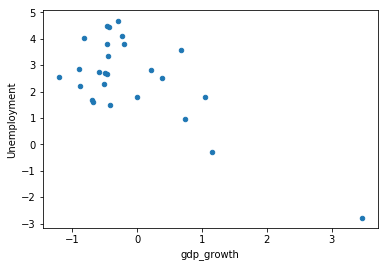

In [15]:
xy = mergeddata.plot(x = 'Unemployment', y = 'gdp_growth', kind = 'scatter') 
xy.set_xlabel('gdp_growth') 
xy.set_ylabel('Unemployment')

One can see on the plot that there seems to be a negative relationship. However, there are some points where the change in unemployment rate is positive and so is the GDP growth.

In [ ]:
#Plot timeseries

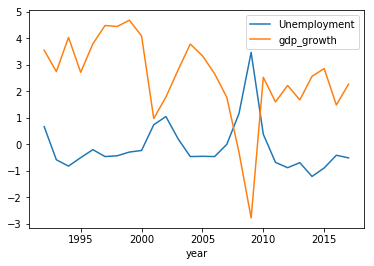

In [16]:
def plot(mergeddata):
   mergeddata_indexed = mergeddata.set_index('year')
   mergeddata_indexed.plot(legend=True)
    
plot(mergeddata)

On the plot it generally seems that in most places there is an adverse correlation between the change in the unemployment rate and GDP growth. This seems strongest during the 2 recessions in the start 2000's and 2008. The relationship becomes less clear during the stable periods without recession.

In [ ]:
#Import packages:

In [17]:
from numpy import arange,array,ones
from scipy import stats

In [ ]:
#Regression:

In [18]:
x = mergeddata['Unemployment'] 
y = mergeddata['gdp_growth']

In [ ]:
# Generated linear fit

Text(0.5, 0, 'Unemployment')

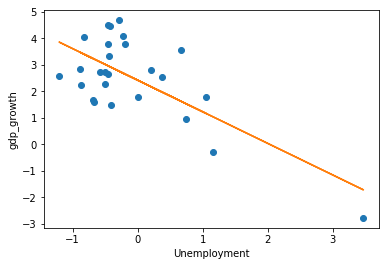

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.plot(x,y,'o', x, line)
ax = plt.gca()
fig = plt.gcf()
ax.set_ylabel('gdp_growth') 
ax.set_xlabel('Unemployment')

Making a linear fit based on the scatter plot before one sees a negative relationship but with many datapoints lying a bit away from the regression line.